In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn import metrics

#меняем значения столбцов
def swap(index1, index2, iterable):
    for x in iterable:
        x[index1],x[index2]=x[index2],x[index1]

# чтение данных
dataset = np.loadtxt(open("heart.dat","r"), delimiter=",", skiprows=0)

r1=3 #resting blood pressure 
r2=7 #maximum heart rate achieved 

X = dataset[:, 0 : -1] # атрибуты

#меняем первый столбец и второй столбец с столбцами под номерами r1 и r2
swap(0, r1, X)
swap(1, r2, X)

X = X[:, :2] # возьмём только первые 2 признака, чтобы проще воспринять вывод
y =  (dataset[:, -1]).astype(np.int64, copy=False) # классы 

C = 1.0  # Возьмем сначала одинаковый параметр C, разные функции ядра
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', C=C).fit(X, y)
sigmoid_svc = svm.SVC(kernel='sigmoid', C=C).fit(X, y)

# создаём сетку для построения графика
h = .02  # Шаг сетки
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

# заголовки для графиков
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with rbf kernel',
          'SVC with sigmoid kernel']






Точность классификации для SVC with linear kernel :
70.00%
Точность классификации для LinearSVC (linear kernel) :
48.52%
Точность классификации для SVC with rbf kernel :
96.30%
Точность классификации для SVC with sigmoid kernel :
55.56%


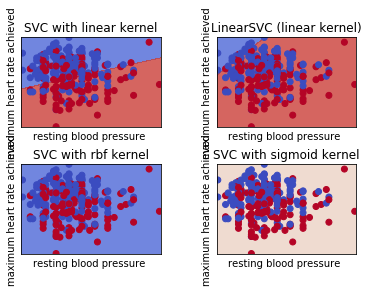

In [3]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, sigmoid_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('resting blood pressure ')
    plt.ylabel('maximum heart rate achieved')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    pred = clf.predict(X)
    print('Точность классификации для', titles[i], ':')
    print('{:.2%}'.format(metrics.accuracy_score(y, pred)))


plt.show()


In [4]:
#проведем эксперимент с параметром регулиризации SVM RBF C =[1,10,100,1000]

Точность классификации для rbf C=1 :
96.30%
Точность классификации для rbf C=10 :
97.04%
Точность классификации для rbf C=100 :
97.04%
Точность классификации для rbf C=1000 :
97.04%


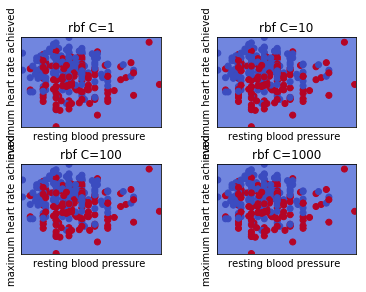

In [3]:
rbf_svc_c1 = svm.SVC(kernel='rbf', C=1).fit(X, y)
rbf_svc_c10 = svm.SVC(kernel='rbf', C=10).fit(X, y)
rbf_svc_c100 = svm.SVC(kernel='rbf', C=100).fit(X, y)
rbf_svc_c1000 = svm.SVC(kernel='rbf', C=1000).fit(X, y)
# заголовки для графиков
titles = ['rbf C=1',
          'rbf C=10',
          'rbf C=100',
          'rbf C=1000']

#вычислим точность классификации и построим граффики
for i, clf in enumerate((rbf_svc_c1, rbf_svc_c10, rbf_svc_c100, rbf_svc_c1000)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('resting blood pressure ')
    plt.ylabel('maximum heart rate achieved')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    pred = clf.predict(X)
    print('Точность классификации для', titles[i], ':')
    print('{:.2%}'.format(metrics.accuracy_score(y, pred)))


plt.show()



In [4]:
#проведем эксперимент с шириной ядра SVM RBF gamma =[0.7,10,100,1000]

Точность классификации для rbf gamma=0.7 :
96.67%
Точность классификации для rbf gamma=10 :
97.04%
Точность классификации для rbf gamma=100 :
97.04%
Точность классификации для rbf gamma=1000 :
97.04%


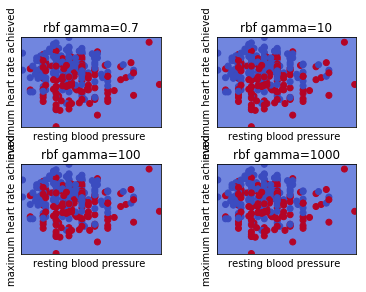

In [5]:
rbf_svc_g07 = svm.SVC(kernel='rbf', gamma=0.7).fit(X, y)
rbf_svc_g10 = svm.SVC(kernel='rbf', gamma=10).fit(X, y)
rbf_svc_g100 = svm.SVC(kernel='rbf', gamma=100).fit(X, y)
rbf_svc_g1000 = svm.SVC(kernel='rbf', gamma=1000).fit(X, y)
# заголовки для графиков
titles = ['rbf gamma=0.7',
          'rbf gamma=10',
          'rbf gamma=100',
          'rbf gamma=1000']

#вычислим точность классификации и построим граффики
for i, clf in enumerate((rbf_svc_g07, rbf_svc_g10, rbf_svc_g100, rbf_svc_g1000)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('resting blood pressure ')
    plt.ylabel('maximum heart rate achieved')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    pred = clf.predict(X)
    print('Точность классификации для', titles[i], ':')
    print('{:.2%}'.format(metrics.accuracy_score(y, pred)))


plt.show()